In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("BIKE DETAILS.csv")
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [3]:
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.1+ KB


In [5]:
df.isnull().sum()

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

In [6]:
df.ex_showroom_price

0            NaN
1            NaN
2       148114.0
3        89643.0
4            NaN
          ...   
1056     52000.0
1057     51000.0
1058     57000.0
1059     58000.0
1060     75000.0
Name: ex_showroom_price, Length: 1061, dtype: float64

In [7]:
df['ex_showroom_price'].fillna(df['ex_showroom_price'].median(), inplace=True)


In [8]:
df.isnull().sum()

name                 0
selling_price        0
year                 0
seller_type          0
owner                0
km_driven            0
ex_showroom_price    0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  1061 non-null   float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.1+ KB


In [10]:
# q.1 What is the range of selling prices in the dataset

price_range = df["selling_price"].max() - df["selling_price"].min()
print("Range of Selling Prices:", price_range)

Range of Selling Prices: 755000


In [11]:
# q.2 What is the median selling price for bikes in the dataset

df["selling_price"].median

<bound method Series.median of 0       175000
1        45000
2       150000
3        65000
4        20000
         ...  
1056     17000
1057     16000
1058     15000
1059     12000
1060     10000
Name: selling_price, Length: 1061, dtype: int64>

In [12]:
#q.3 What is the most common seller type
df.seller_type.value_counts()
# most commmon seller type is individuals seller type


seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64

In [13]:
#Q.4 How many bikes have driven more than 50,000 kilometersD
df.km_driven.value_counts(1)*100
# there are 3.48 percent bikes are driven more than the 50,000 km

km_driven
20000     3.675778
40000     3.581527
50000     3.487276
25000     2.921772
30000     2.639020
            ...   
33200     0.094251
646000    0.094251
3909      0.094251
7672      0.094251
92233     0.094251
Name: proportion, Length: 304, dtype: float64

In [14]:
#Q.5 What is the average km_driven value for each ownership type
import pandas as pd

# Load the dataset
df = pd.read_csv("BIKE DETAILS.csv")  # Replace with your actual file path

# Calculate the average km_driven for each ownership type
avg_km_per_ownership = df.groupby("owner")["km_driven"].mean()

# Display the result
print(avg_km_per_ownership)


owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [15]:
#Q.6 
# Calculate the proportion of bikes from 2015 or older
proportion_2015_or_older = (df["year"] <= 2015).mean()

# Display the result as a percentage
print(f"Proportion of bikes from 2015 or older: {proportion_2015_or_older:.2%}")

Proportion of bikes from 2015 or older: 56.64%


Missing values trend:
 ex_showroom_price    435
dtype: int64


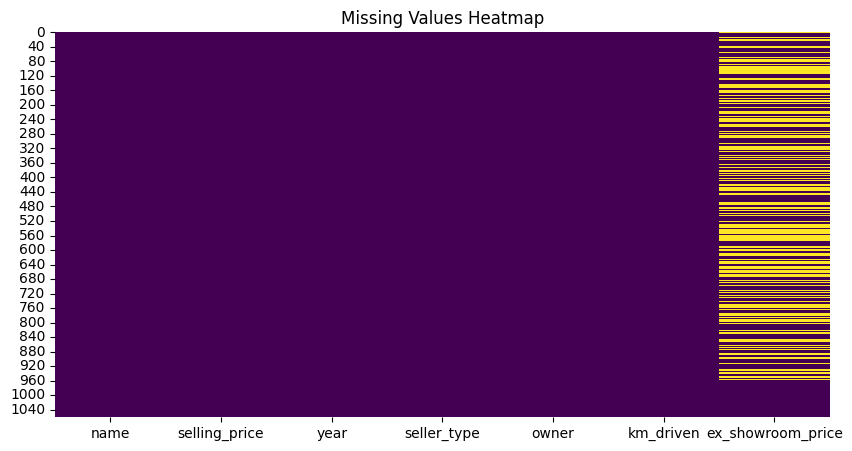

In [16]:
#Q.7 
import pandas as pd

# Load the dataset
df = pd.read_csv("BIKE DETAILS.csv")  # Replace with your actual file path

# Count missing values for each column
missing_values = df.isnull().sum()

# Filter columns that have missing values
missing_values = missing_values[missing_values > 0]

# Display the result
print("Missing values trend:\n", missing_values)

# (Optional) Visualize missing values using Seaborn
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()




In [17]:
#Q.8 
import pandas as pd

# Load the dataset
df = pd.read_csv("BIKE DETAILS.csv")  # Replace with your actual file path

# Drop rows where 'ex_showroom_price' is missing
df = df.dropna(subset=["ex_showroom_price"])

# Convert 'ex_showroom_price' to numeric (if it's stored as a string)
df["ex_showroom_price"] = pd.to_numeric(df["ex_showroom_price"], errors="coerce")

# Find the row with the highest ex_showroom_price
max_price_row = df.loc[df["ex_showroom_price"].idxmax()]

# Extract the highest price and bike name
max_price = max_price_row["ex_showroom_price"]
bike_name = max_price_row["name"]

# Display result
print(f"Highest Ex-Showroom Price: ₹{max_price:,} for {bike_name}")


Highest Ex-Showroom Price: ₹1,278,000.0 for Harley-Davidson Street Bob


In [18]:
#Q.9 
# Count the number of bikes listed by each seller type
bikes_per_seller = df["seller_type"].value_counts()

# Display result
print("Total number of bikes listed by each seller type:\n", bikes_per_seller)

Total number of bikes listed by each seller type:
 seller_type
Individual    623
Dealer          3
Name: count, dtype: int64


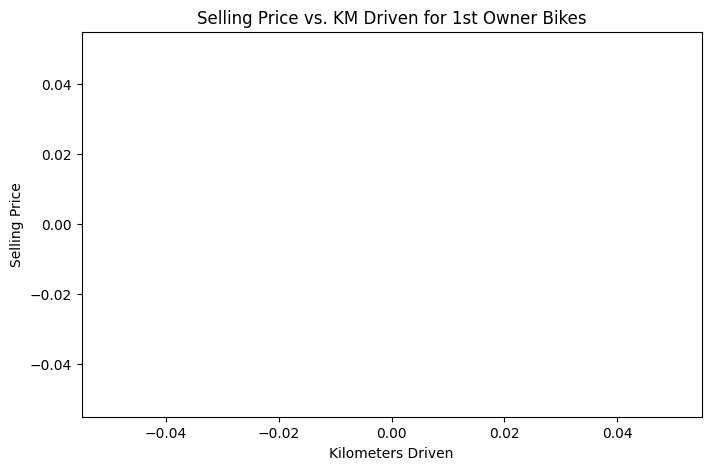

Correlation between Selling Price and KM Driven for 1st Owner Bikes: nan


In [19]:
#Q>10 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("BIKE DETAILS.csv")  # Replace with your actual file path

# Filter for 1st Owner bikes
first_owner_bikes = df[df["owner"] == "1st Owner"]

# Scatter plot to visualize the relationship
plt.figure(figsize=(8, 5))
sns.scatterplot(data=first_owner_bikes, x="km_driven", y="selling_price", alpha=0.5)
plt.xlabel("Kilometers Driven")
plt.ylabel("Selling Price")
plt.title("Selling Price vs. KM Driven for 1st Owner Bikes")
plt.show()

# Calculate correlation between km_driven and selling_price
correlation = first_owner_bikes["km_driven"].corr(first_owner_bikes["selling_price"])
print(f"Correlation between Selling Price and KM Driven for 1st Owner Bikes: {correlation:.2f}")


In [20]:
#Q>11 
import pandas as pd

# Load the dataset
df = pd.read_csv("BIKE DETAILS.csv")  # Replace with your actual file path

# Compute Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df["km_driven"].quantile(0.25)
Q3 = df["km_driven"].quantile(0.75)

# Compute IQR
IQR = Q3 - Q1

# Define lower and upper bounds for non-outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df_cleaned = df[(df["km_driven"] >= lower_bound) & (df["km_driven"] <= upper_bound)]

# Display results
print(f"Original dataset size: {len(df)}")
print(f"Cleaned dataset size: {len(df_cleaned)}")
print(f"Number of outliers removed: {len(df) - len(df_cleaned)}")


Original dataset size: 1061
Cleaned dataset size: 1022
Number of outliers removed: 39


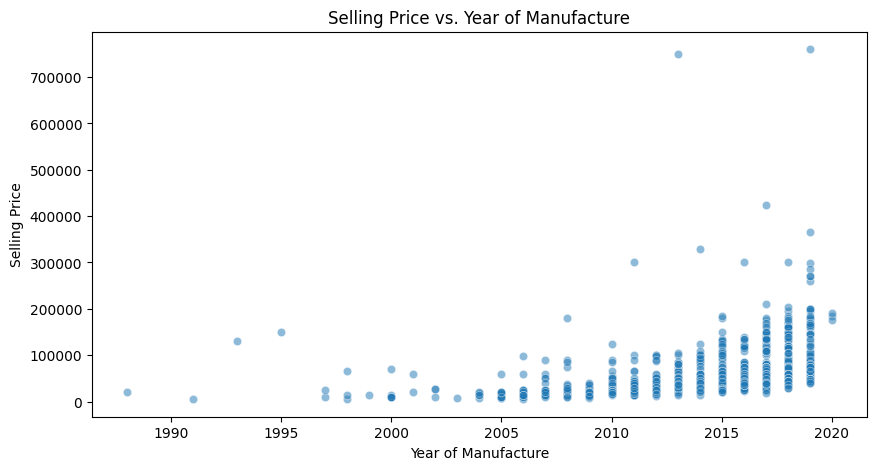

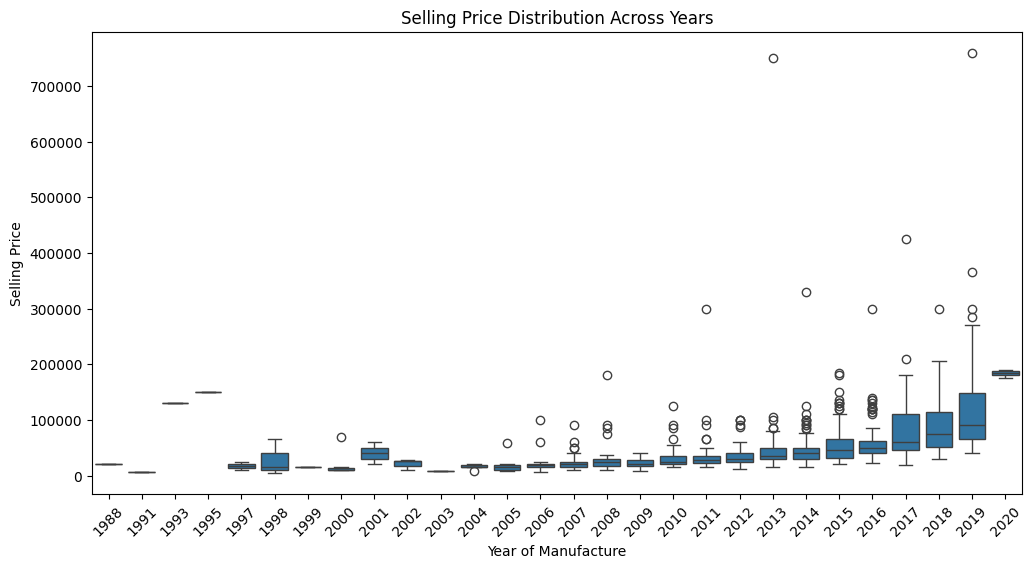

Correlation between Year and Selling Price: 0.40


In [21]:
#Q>12
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("BIKE DETAILS.csv")  # Replace with your actual file path

# Scatter plot to visualize the relationship
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x="year", y="selling_price", alpha=0.5)
plt.xlabel("Year of Manufacture")
plt.ylabel("Selling Price")
plt.title("Selling Price vs. Year of Manufacture")
plt.show()

# Box plot to see distribution of selling price across years
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="year", y="selling_price")
plt.xticks(rotation=45)
plt.xlabel("Year of Manufacture")
plt.ylabel("Selling Price")
plt.title("Selling Price Distribution Across Years")
plt.show()

# Calculate correlation between year and selling price
correlation = df["year"].corr(df["selling_price"])
print(f"Correlation between Year and Selling Price: {correlation:.2f}")


In [22]:
#Q.13
import pandas as pd
import datetime

# Load the dataset
df = pd.read_csv("BIKE DETAILS.csv")  # Replace with your actual file path

# Get the current year
current_year = datetime.datetime.now().year

# Calculate bike age
df["bike_age"] = current_year - df["year"]

# Avoid division by zero (for bikes from the current year)
df = df[df["bike_age"] > 0]

# Calculate depreciation per year
df["depreciation_per_year"] = df["selling_price"] / df["bike_age"]

# Compute the average depreciation
average_depreciation = df["depreciation_per_year"].mean()

print(f"Average Depreciation in Selling Price per Year: {average_depreciation:.2f}")


Average Depreciation in Selling Price per Year: 7001.30


In [23]:
#Q.14
import pandas as pd

# Load the dataset
df = pd.read_csv("BIKE DETAILS.csv")  # Replace with your actual file path

# Calculate the average selling price for each manufacturing year
yearly_avg_price = df.groupby("year")["selling_price"].mean()

# Merge this back to the original dataframe
df["avg_price_for_year"] = df["year"].map(yearly_avg_price)

# Identify bikes priced significantly above the average (e.g., 1.5 times the average price)
df["price_above_avg"] = df["selling_price"] > (1.5 * df["avg_price_for_year"])

# Filter only the significantly higher-priced bikes
expensive_bikes = df[df["price_above_avg"]][["name", "year", "selling_price", "avg_price_for_year"]]

# Display the result
print(expensive_bikes)



                                     name  year  selling_price  \
2     Royal Enfield Classic Gunmetal Grey  2018         150000   
7    Royal Enfield Bullet 350 [2007-2011]  2008         180000   
13                          Yamaha YZF R3  2019         365000   
18    Royal Enfield Classic Gunmetal Grey  2018         150000   
23                          Jawa Standard  2019         180000   
..                                    ...   ...            ...   
979             Royal Enfield Thunder 500  2015         105000   
981             Royal Enfield Thunder 350  2013         105000   
983             Royal Enfield Classic 350  2015         100000   
984             Royal Enfield Classic 500  2014          95000   
985             Royal Enfield Classic 500  2011          90000   

     avg_price_for_year  
2          87660.374046  
7          34289.285714  
13        119689.511628  
18         87660.374046  
23        119689.511628  
..                  ...  
979        56500.000000  

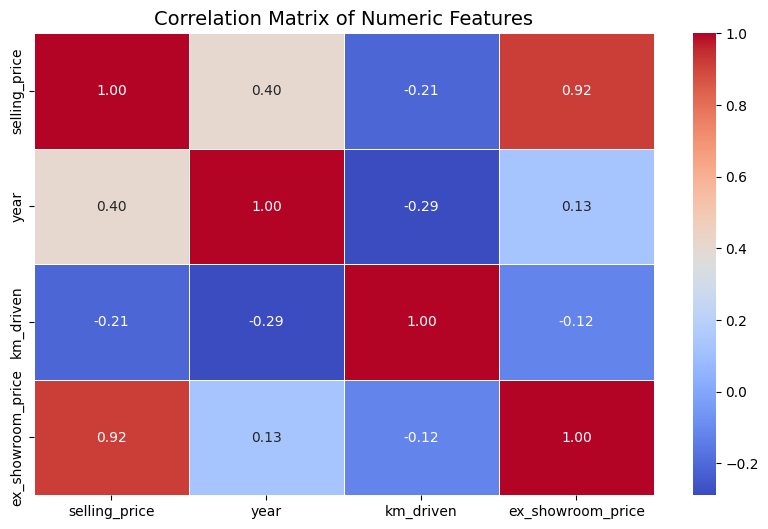

In [24]:
#Q>15 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("BIKE DETAILS.csv")  # Replace with your actual file path

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Add title
plt.title("Correlation Matrix of Numeric Features", fontsize=14)
plt.show()




**EDA TWO CAR SALE**

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

# Load the dataset
df = pd.read_csv("Car Sale.csv")  # Replace with actual file path




In [26]:
df

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


Dealer_Name
U-Haul CO                                          28769.919006
Classic Chevy                                      28602.014446
Rabun Used Car Sales                               28527.536177
Iceberg Rentals                                    28522.958533
Enterprise Rent A Car                              28312.580800
Scrivener Performance Engineering                  28297.371589
Gartner Buick Hyundai Saab                         28247.621019
Saab-Belle Dodge                                   28190.139888
Capitol KIA                                        28189.703822
Race Car Help                                      28163.372706
Chrysler of Tri-Cities                             28123.091054
Star Enterprises Inc                               28113.055244
Suburban Ford                                      28112.206758
C & M Motors Inc                                   28111.755200
Tri-State Mack Inc                                 28095.562050
Pars Auto Sales             

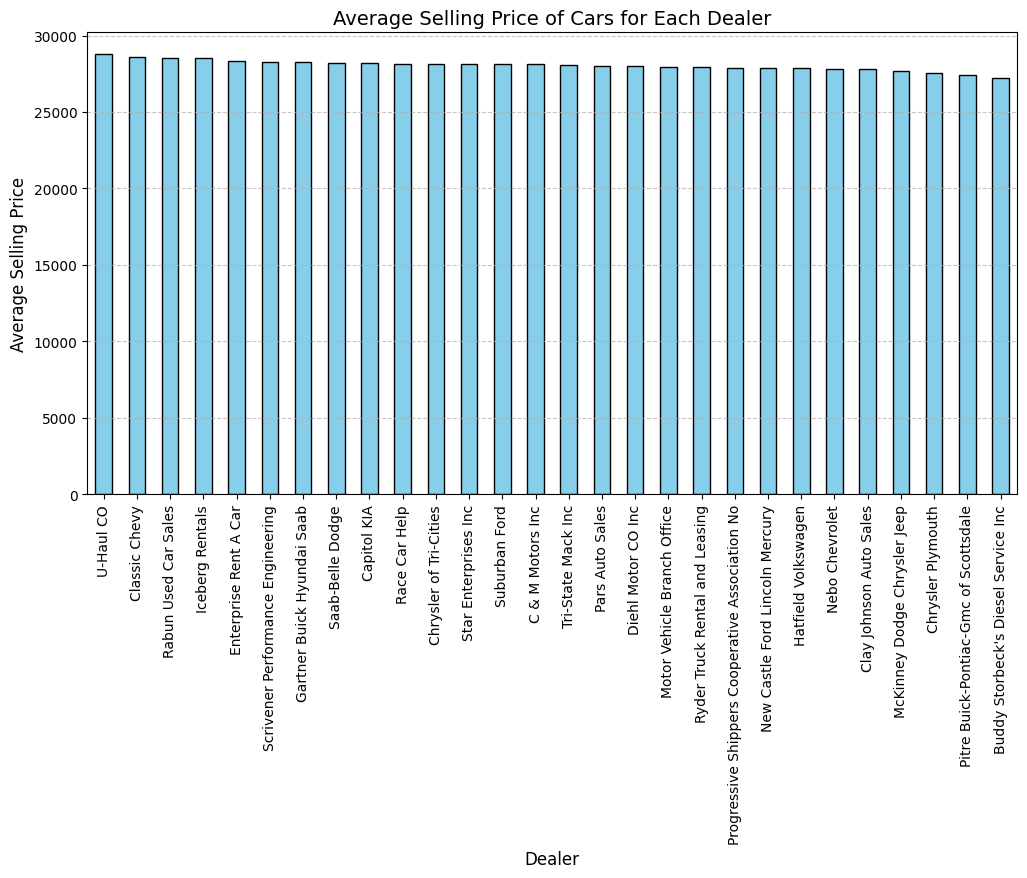

In [27]:
#q.1 
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Car Sale.csv")  # Ensure this is the correct file path

# Group by dealer and calculate the average selling price
dealer_avg_price = df.groupby('Dealer_Name')['Price ($)'].mean().sort_values(ascending=False)

# Display the result
print(dealer_avg_price)

# Plot the average selling price per dealer
plt.figure(figsize=(12, 6))
dealer_avg_price.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel("Dealer", fontsize=12)
plt.ylabel("Average Selling Price", fontsize=12)
plt.title("Average Selling Price of Cars for Each Dealer", fontsize=14)
plt.xticks(rotation=90)  # Rotate dealer names for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


Company with highest price variation:
 Company
Lincoln    19658.050211
Name: Price ($), dtype: float64


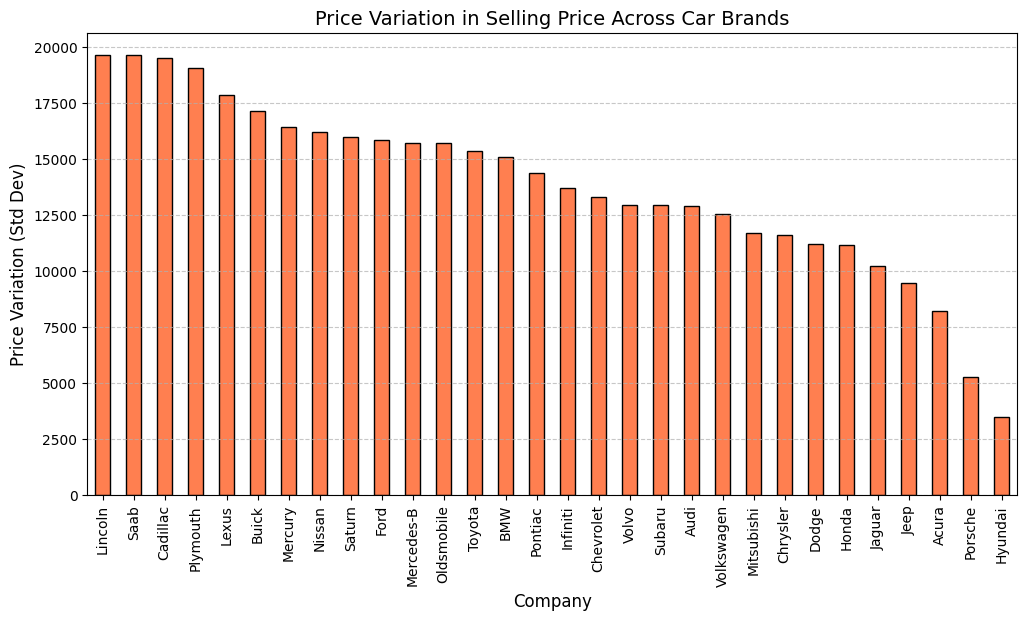

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Car Sale.csv")  # Ensure the correct file path

# Group by company and calculate the standard deviation of selling prices
price_variation = df.groupby('Company')['Price ($)'].std().sort_values(ascending=False)

# Display the company with the highest variation
print("Company with highest price variation:\n", price_variation.head(1))

# Plot the price variations
plt.figure(figsize=(12, 6))
price_variation.plot(kind='bar', color='coral', edgecolor='black')

# Add labels and title
plt.xlabel("Company", fontsize=12)
plt.ylabel("Price Variation (Std Dev)", fontsize=12)
plt.title("Price Variation in Selling Price Across Car Brands", fontsize=14)
plt.xticks(rotation=90)  # Rotate company names for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


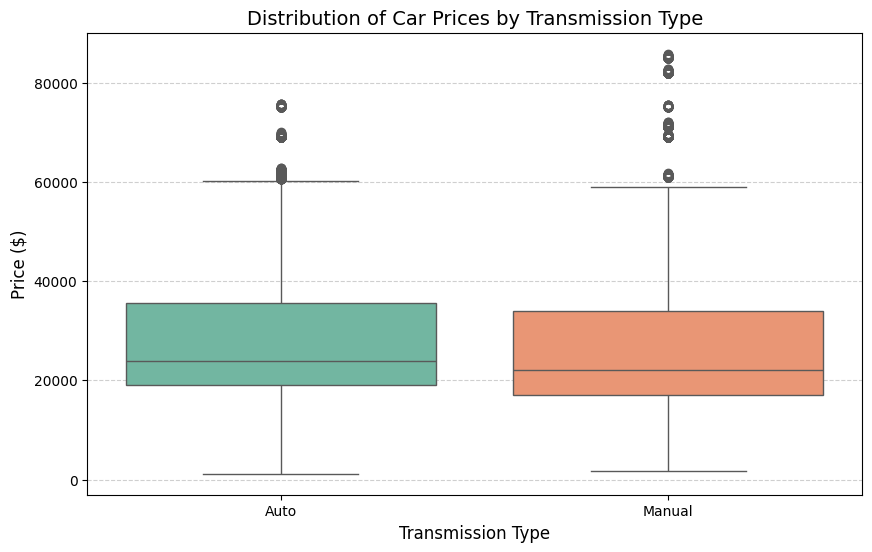

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("Car Sale.csv")  # Ensure correct file path

# Check for missing values in 'Transmission' and 'Selling_Price' columns
df = df.dropna(subset=['Transmission', 'Price ($)'])

# Plot boxplot for price distribution based on transmission type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Transmission', y='Price ($)', data=df, palette='Set2')

# Add labels and title
plt.xlabel("Transmission Type", fontsize=12)
plt.ylabel("Price ($)", fontsize=12)
plt.title("Distribution of Car Prices by Transmission Type", fontsize=14)

# Show the plot
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


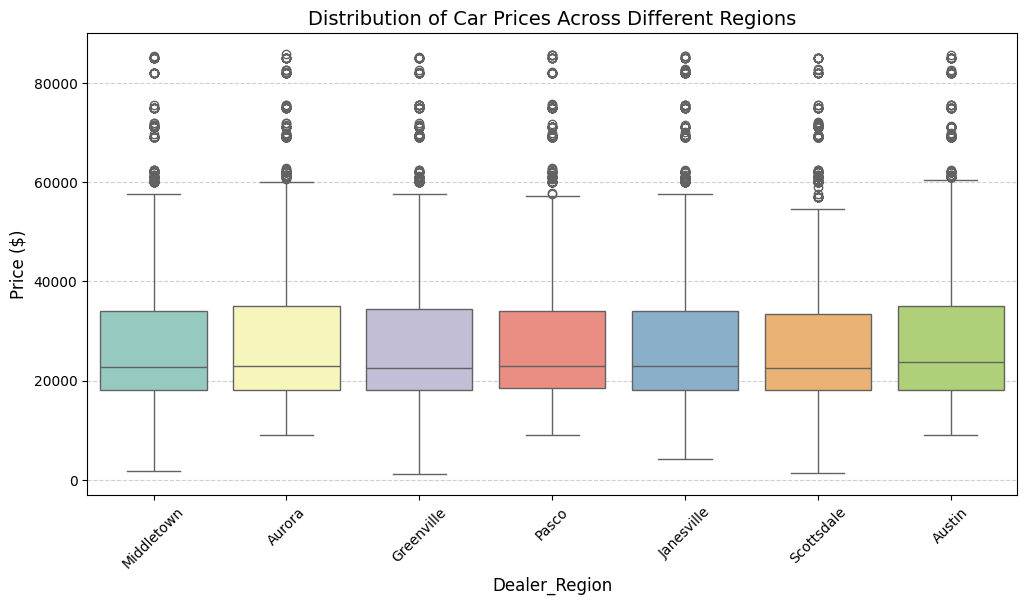

In [30]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Car Sale.csv")  # Ensure the correct file path

# Check for missing values in 'Region' and 'Selling_Price' columns
df = df.dropna(subset=['Dealer_Region', 'Price ($)'])

# Plot boxplot for price distribution based on region
plt.figure(figsize=(12, 6))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df, palette='Set3')

# Customize labels and title
plt.xlabel("Dealer_Region", fontsize=12)
plt.ylabel("Price ($)", fontsize=12)
plt.title("Distribution of Car Prices Across Different Regions", fontsize=14)
plt.xticks(rotation=45)  # Rotate x labels for better readability

# Show plot
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()



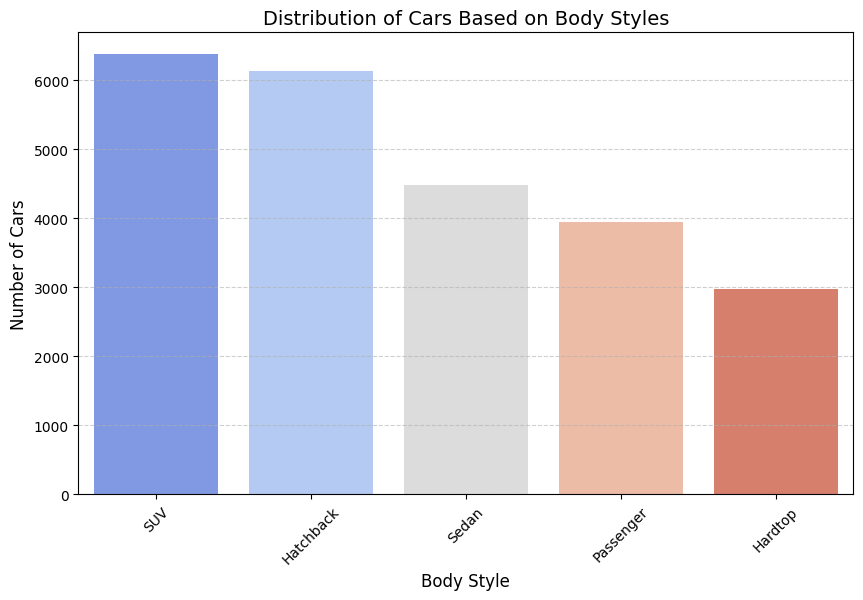

In [31]:
#q.5 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Car Sale.csv")  # Ensure the correct file path

# Check for missing values in 'Body_Style' column and drop them
df = df.dropna(subset=['Body Style'])

# Count the number of cars per body style
body_style_counts = df['Body Style'].value_counts()

# Plot bar chart for distribution of cars by body style
plt.figure(figsize=(10, 6))
sns.barplot(x=body_style_counts.index, y=body_style_counts.values, palette='coolwarm')

# Customize labels and title
plt.xlabel("Body Style", fontsize=12)
plt.ylabel("Number of Cars", fontsize=12)
plt.title("Distribution of Cars Based on Body Styles", fontsize=14)
plt.xticks(rotation=45)  # Rotate x labels for better readability

# Show plot
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


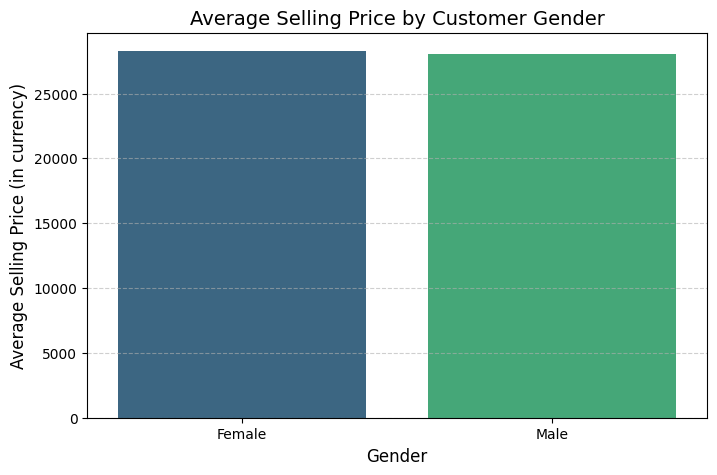

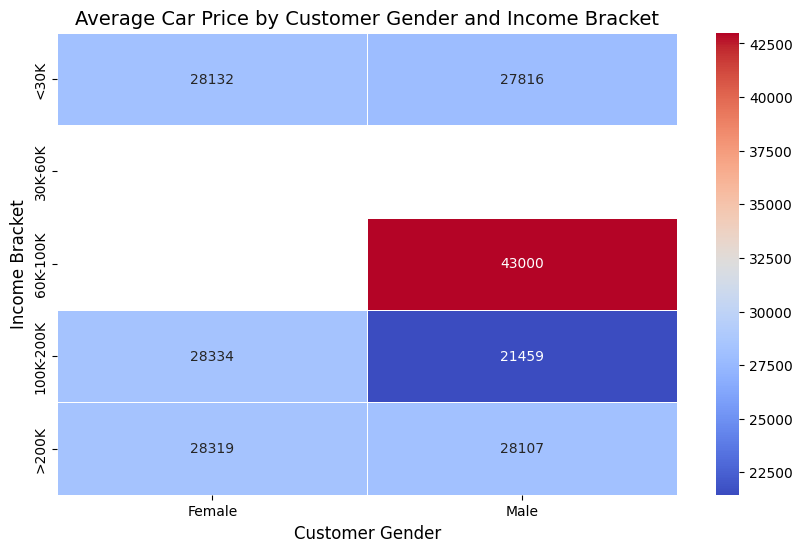

In [32]:
#Q.6
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Car Sale.csv")  # Ensure the correct file path

# Check if required columns exist
if 'Gender' in df.columns and 'Annual Income' in df.columns and 'Price ($)' in df.columns:
    
    # Group by Gender and calculate average selling price
    avg_price_by_gender = df.groupby('Gender')['Price ($)'].mean()

    # Plot the average selling price by gender
    plt.figure(figsize=(8, 5))
    sns.barplot(x=avg_price_by_gender.index, y=avg_price_by_gender.values, palette='viridis')
    
    plt.xlabel("Gender", fontsize=12)
    plt.ylabel("Average Selling Price (in currency)", fontsize=12)
    plt.title("Average Selling Price by Customer Gender", fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.show()

    # Divide customers into income brackets (bins)
    df['Income_Bracket'] = pd.cut(df['Annual Income'], bins=[0, 30000, 60000, 100000, 200000, df['Annual Income'].max()], 
                                  labels=['<30K', '30K-60K', '60K-100K', '100K-200K', '>200K'])

    # Group by income bracket and gender to find average car price
    avg_price_by_income = df.groupby(['Income_Bracket', 'Gender'])['Price ($)'].mean().unstack()

    # Plot heatmap to visualize price variations
    plt.figure(figsize=(10, 6))
    sns.heatmap(avg_price_by_income, annot=True, fmt=".0f", cmap="coolwarm", linewidths=0.5)
    
    plt.xlabel("Customer Gender", fontsize=12)
    plt.ylabel("Income Bracket", fontsize=12)
    plt.title("Average Car Price by Customer Gender and Income Bracket", fontsize=14)
    plt.show()
    
else:
    print("Required columns not found in dataset. Please check column names.")


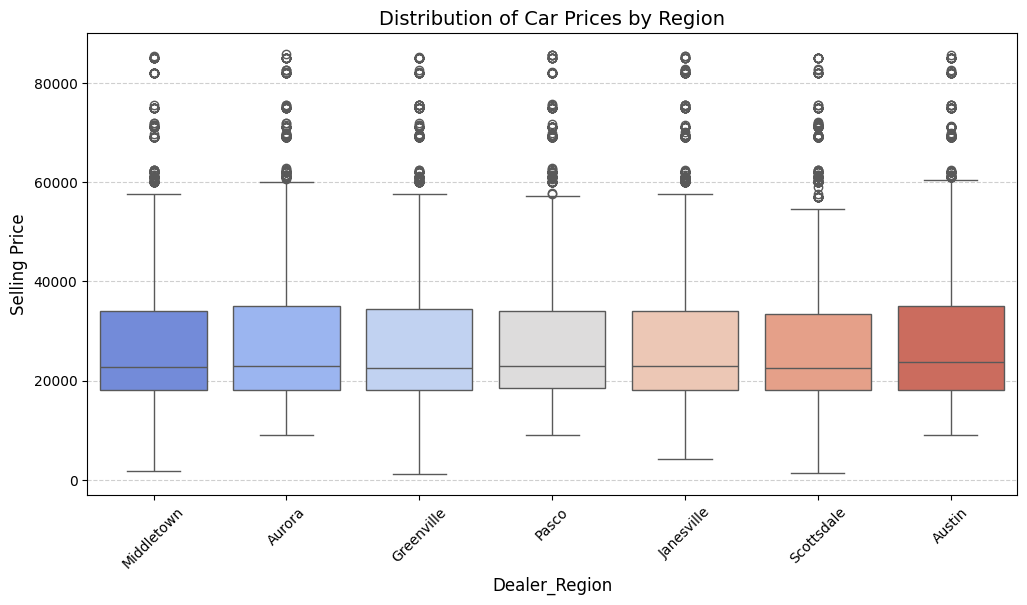

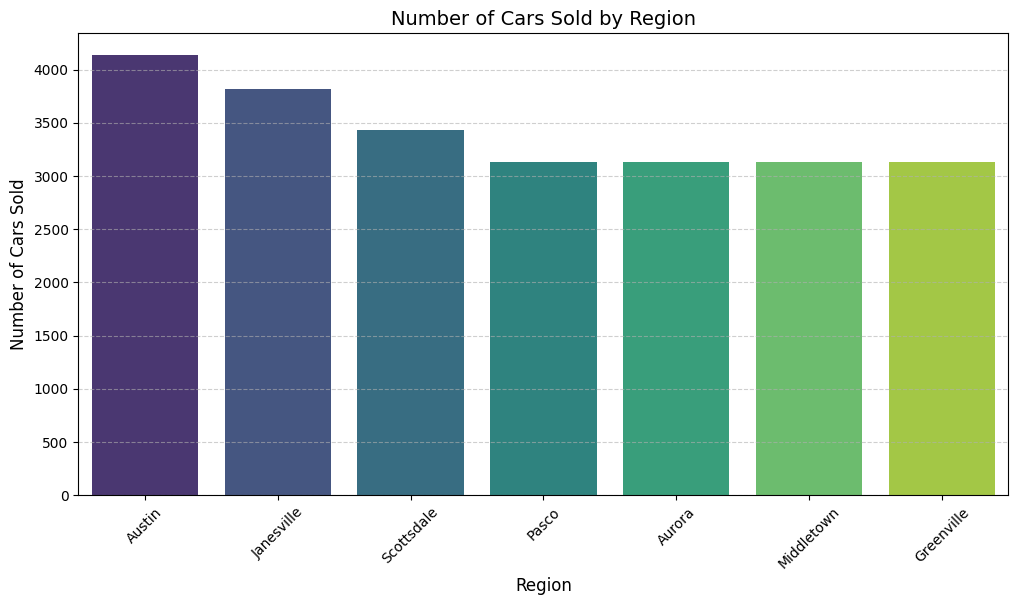

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Car Sale.csv")  # Ensure the correct file path

# Check if required columns exist
if 'Dealer_Region' in df.columns and 'Price ($)' in df.columns:
    
    # 1. Distribution of Car Prices by Region (Box Plot)
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Dealer_Region', y='Price ($)', data=df, palette='coolwarm')
    
    plt.xlabel("Dealer_Region", fontsize=12)
    plt.ylabel("Selling Price", fontsize=12)
    plt.title("Distribution of Car Prices by Region", fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.show()

    # 2. Number of Cars Sold by Region (Bar Chart)
    plt.figure(figsize=(12, 6))
    region_counts = df['Dealer_Region'].value_counts()
    sns.barplot(x=region_counts.index, y=region_counts.values, palette='viridis')
    
    plt.xlabel("Region", fontsize=12)
    plt.ylabel("Number of Cars Sold", fontsize=12)
    plt.title("Number of Cars Sold by Region", fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.show()
    
else:
    print("Required columns not found in dataset. Please check column names.")


Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')


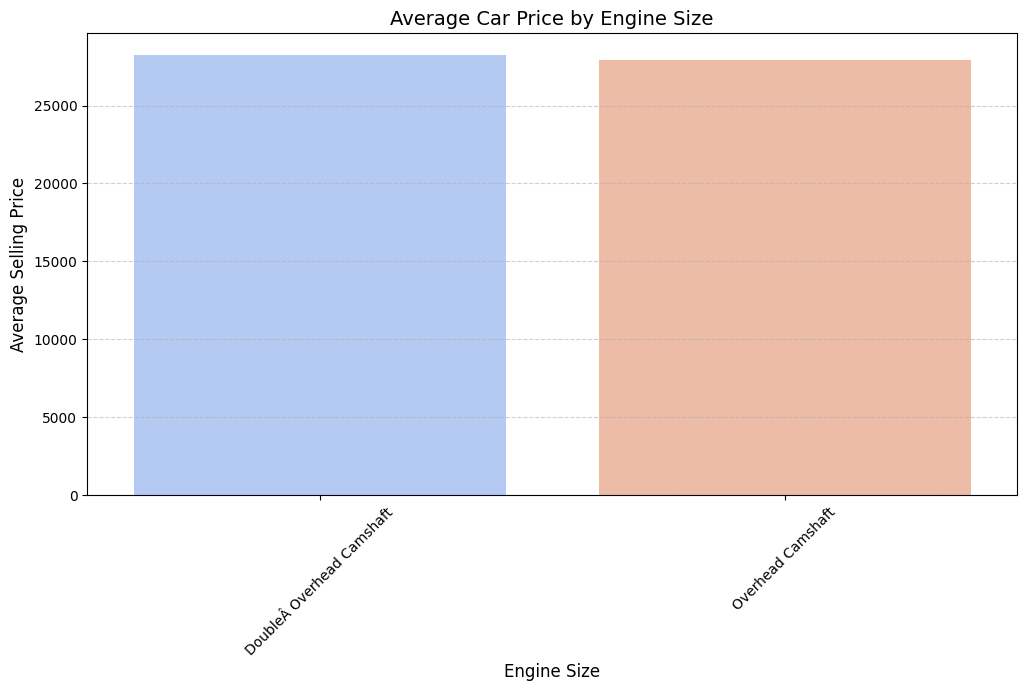

In [34]:
#Q.9 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Car Sale.csv")  # Ensure the correct file path

# Display column names to verify
print(df.columns)

# Check if required columns exist
if 'Engine' in df.columns and 'Price ($)' in df.columns:
    
    # 1. Average Car Price by Engine Size
    avg_price_by_engine = df.groupby('Engine')['Price ($)'].mean().reset_index()
    
    # 2. Plot Average Car Price by Engine Size
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Engine', y='Price ($)', data=avg_price_by_engine, palette='coolwarm')
    
    plt.xlabel("Engine Size", fontsize=12)
    plt.ylabel("Average Selling Price", fontsize=12)
    plt.title("Average Car Price by Engine Size", fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.show()
    
else:
    print("Required columns not found in dataset. Please check column names.")


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Car Sale.csv")  # Ensure the correct file path

# Display column names to verify
print(df.columns)

# Check if required columns exist
if 'Annual Income' in df.columns and 'Price($)' in df.columns:
    
    # 1. Average Car Price by Annual Income Bracket
    avg_price_by_income = df.groupby('Annual Income')['Price ($)'].mean().reset_index()
    
    # 2. Plot Average Car Price by Annual Income Bracket
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Annual Income', y='Price ($)', data=avg_price_by_income, palette='coolwarm')
    plt.xlabel("Annual Income Bracket", fontsize=12)
    plt.ylabel("Average Selling Price", fontsize=12)
    plt.title("Average Car Price by Annual Income Bracket", fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.show()
    


Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')


Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')


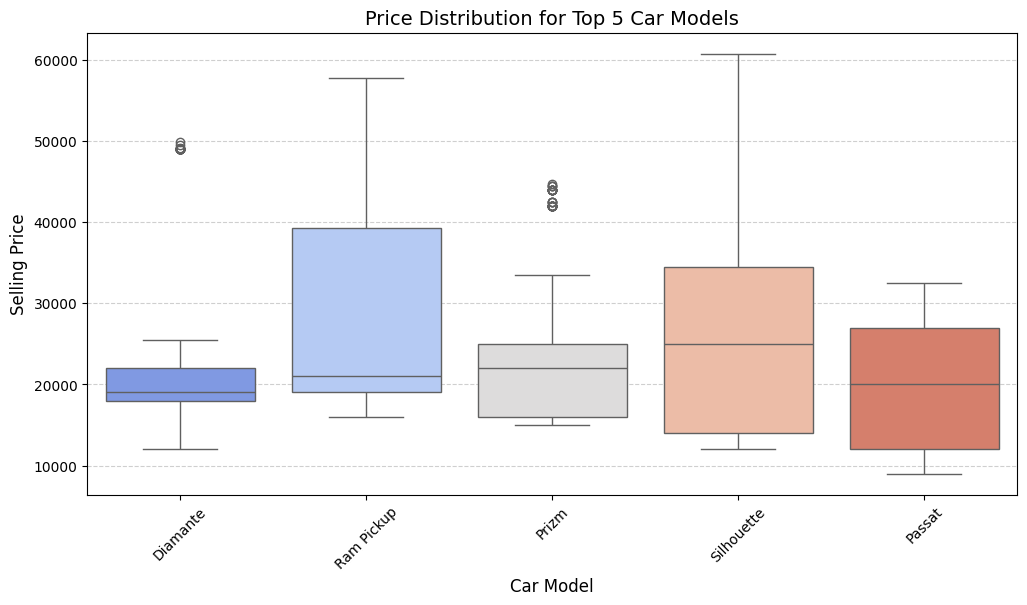

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Car Sale.csv")  # Ensure the correct file path

# Display column names to verify
print(df.columns)

# Check if required columns exist
if 'Model' in df.columns and 'Price ($)' in df.columns:
    
    # 1. Identify Top 5 Car Models with Highest Sales
    top_models = df['Model'].value_counts().nlargest(5).index
    filtered_df = df[df['Model'].isin(top_models)]
    
    # 2. Plot Price Distribution for Top 5 Car Models
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Model', y='Price ($)', data=filtered_df, palette='coolwarm')
    
    plt.xlabel("Car Model", fontsize=12)
    plt.ylabel("Selling Price", fontsize=12)
    plt.title("Price Distribution for Top 5 Car Models", fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.show()
    
else:
    print("Required columns not found in dataset. Please check column names.")


Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')


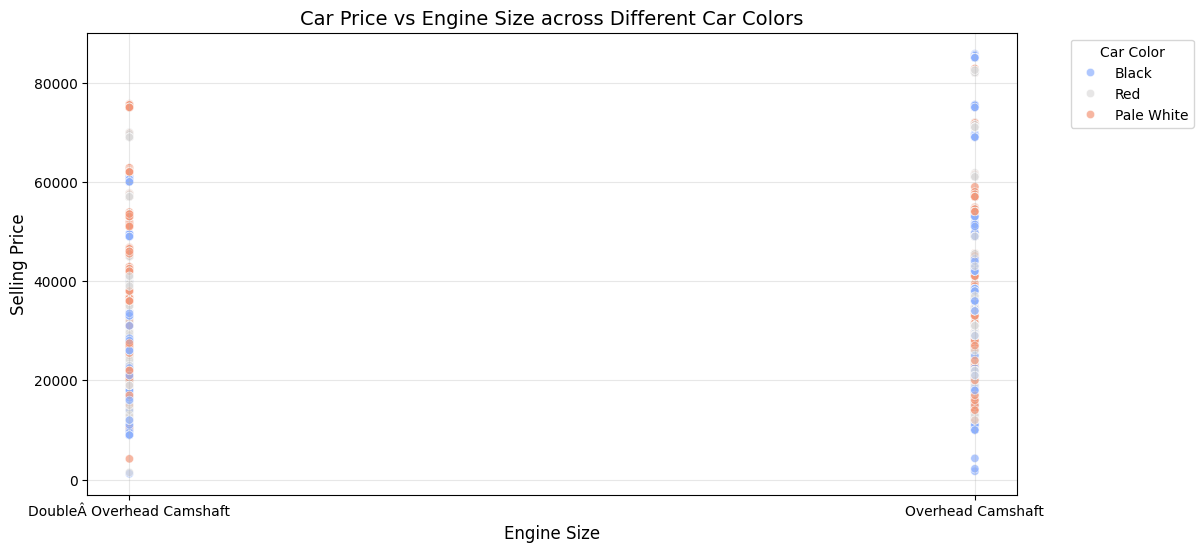

Car Colors with Highest Price Variation:
Color
Red           15519.360962
Black         15286.065976
Pale White    14077.346859
Name: Price ($), dtype: float64


In [37]:
#Q.11 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Car Sale.csv")  # Ensure the correct file path

# Display column names to verify
print(df.columns)

# Check if required columns exist
if 'Engine' in df.columns and 'Price ($)' in df.columns and 'Color' in df.columns:
    
    # 1. Visualize the relationship between car price and engine size across different car colors
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x='Engine', y='Price ($)', hue='Color', data=df, palette='coolwarm', alpha=0.7)
    
    plt.xlabel("Engine Size", fontsize=12)
    plt.ylabel("Selling Price", fontsize=12)
    plt.title("Car Price vs Engine Size across Different Car Colors", fontsize=14)
    plt.legend(title="Car Color", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(alpha=0.3)
    plt.show()
    
    # 2. Identify colors with the highest price variation
    color_variation = df.groupby('Color')['Price ($)'].std().sort_values(ascending=False)
    print("Car Colors with Highest Price Variation:")
    print(color_variation.head(5))
    
else:
    print("Required columns not found in dataset. Please check column names.")


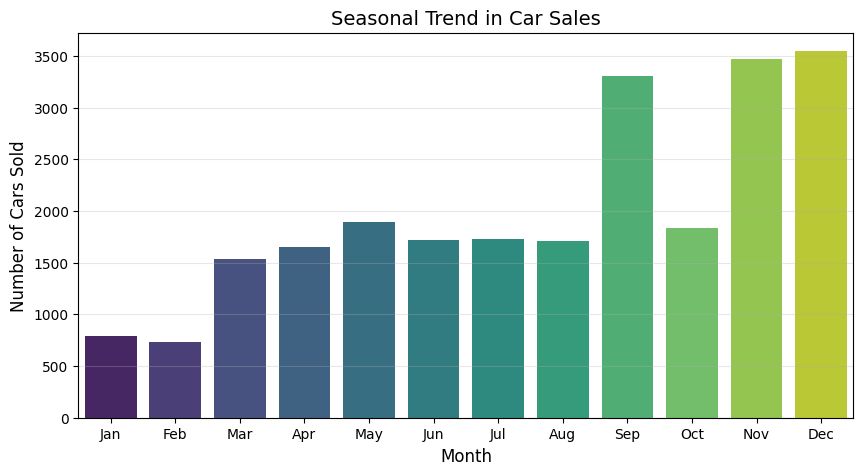

In [38]:
#Q.12 
# Seasonal Trend in Car Sales
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])  # Convert to datetime format
    df['Month'] = df['Date'].dt.month  # Extract month
    
    plt.figure(figsize=(10, 5))
    sns.countplot(x='Month', data=df, palette='viridis')
    plt.xlabel("Month", fontsize=12)
    plt.ylabel("Number of Cars Sold", fontsize=12)
    plt.title("Seasonal Trend in Car Sales", fontsize=14)
    plt.xticks(range(0, 12), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
    plt.grid(axis='y', alpha=0.3)
    plt.show()

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')


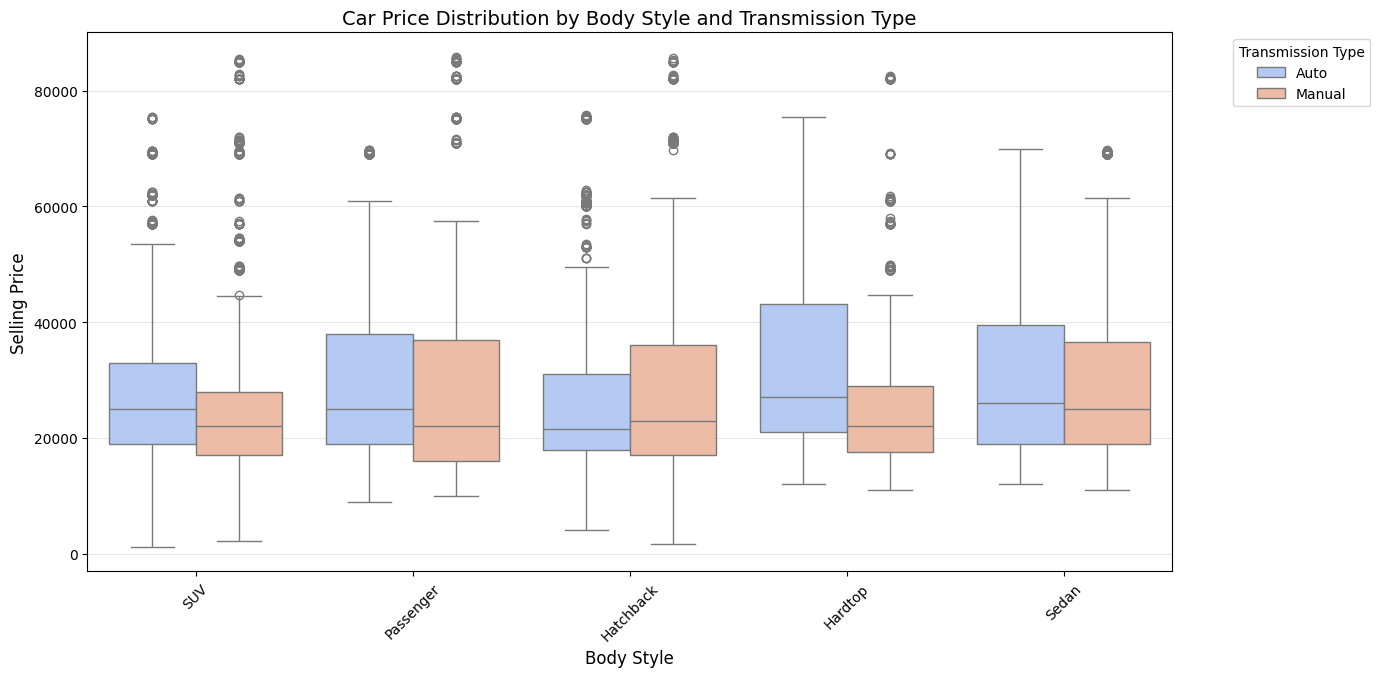

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Car Sale.csv")  # Ensure the correct file path

# Display column names to verify
print(df.columns)

# Check if required columns exist
if 'Body Style' in df.columns and 'Transmission' in df.columns and 'Price ($)' in df.columns:
    
    # 1. Visualize car price distribution across body style and transmission type
    plt.figure(figsize=(14, 7))
    sns.boxplot(x='Body Style', y='Price ($)', hue='Transmission', data=df, palette='coolwarm')
    
    plt.xlabel("Body Style", fontsize=12)
    plt.ylabel("Selling Price", fontsize=12)
    plt.title("Car Price Distribution by Body Style and Transmission Type", fontsize=14)
    plt.legend(title="Transmission Type", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.3)
    plt.show()
    
else:
    print("Required columns not found in dataset. Please check column names.")


In [40]:
#Q>14

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Car Sale.csv")  # Ensure the correct file path

# Display column names to verify
print(df.columns)

# Check if required columns exist
required_columns = ['Price ($)', 'Engine', 'Annual Income']
if all(col in df.columns for col in required_columns):
    
    # Compute correlation matrix
    correlation_matrix = df[required_columns].corr()
    print("Correlation Matrix:\n", correlation_matrix)
    
    # Visualize correlation matrix using a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title("Correlation Matrix: Car Price, Engine Size, and Annual Income")
    plt.show()
    
    # Pairplot to visualize interactions
    sns.pairplot(df[required_columns], diag_kind='kde')
    plt.show()
    
else:
    print("Required columns not found in dataset. Please check column names.")

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')


ValueError: could not convert string to float: 'DoubleÂ\xa0Overhead Camshaft'

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')
Average Selling Price by Car Model and Engine Size:
         Model                     Engine     Price ($)
0       3-Sep  DoubleÂ Overhead Camshaft  37986.380117
1      3000GT  DoubleÂ Overhead Camshaft  22764.326923
2      3000GT          Overhead Camshaft  21770.659864
3        300M  DoubleÂ Overhead Camshaft  21394.888889
4        323i  DoubleÂ Overhead Camshaft  16744.632287
..        ...                        ...           ...
256  Windstar          Overhead Camshaft  17100.272727
257  Wrangler  DoubleÂ Overhead Camshaft  21145.294737
258  Wrangler          Overhead Camshaft  18742.942029
259    Xterra  DoubleÂ Overhead Camshaft  15940.459459
260    Xterra          Overhead Camshaft  31072.500000

[261 rows x 3 columns]


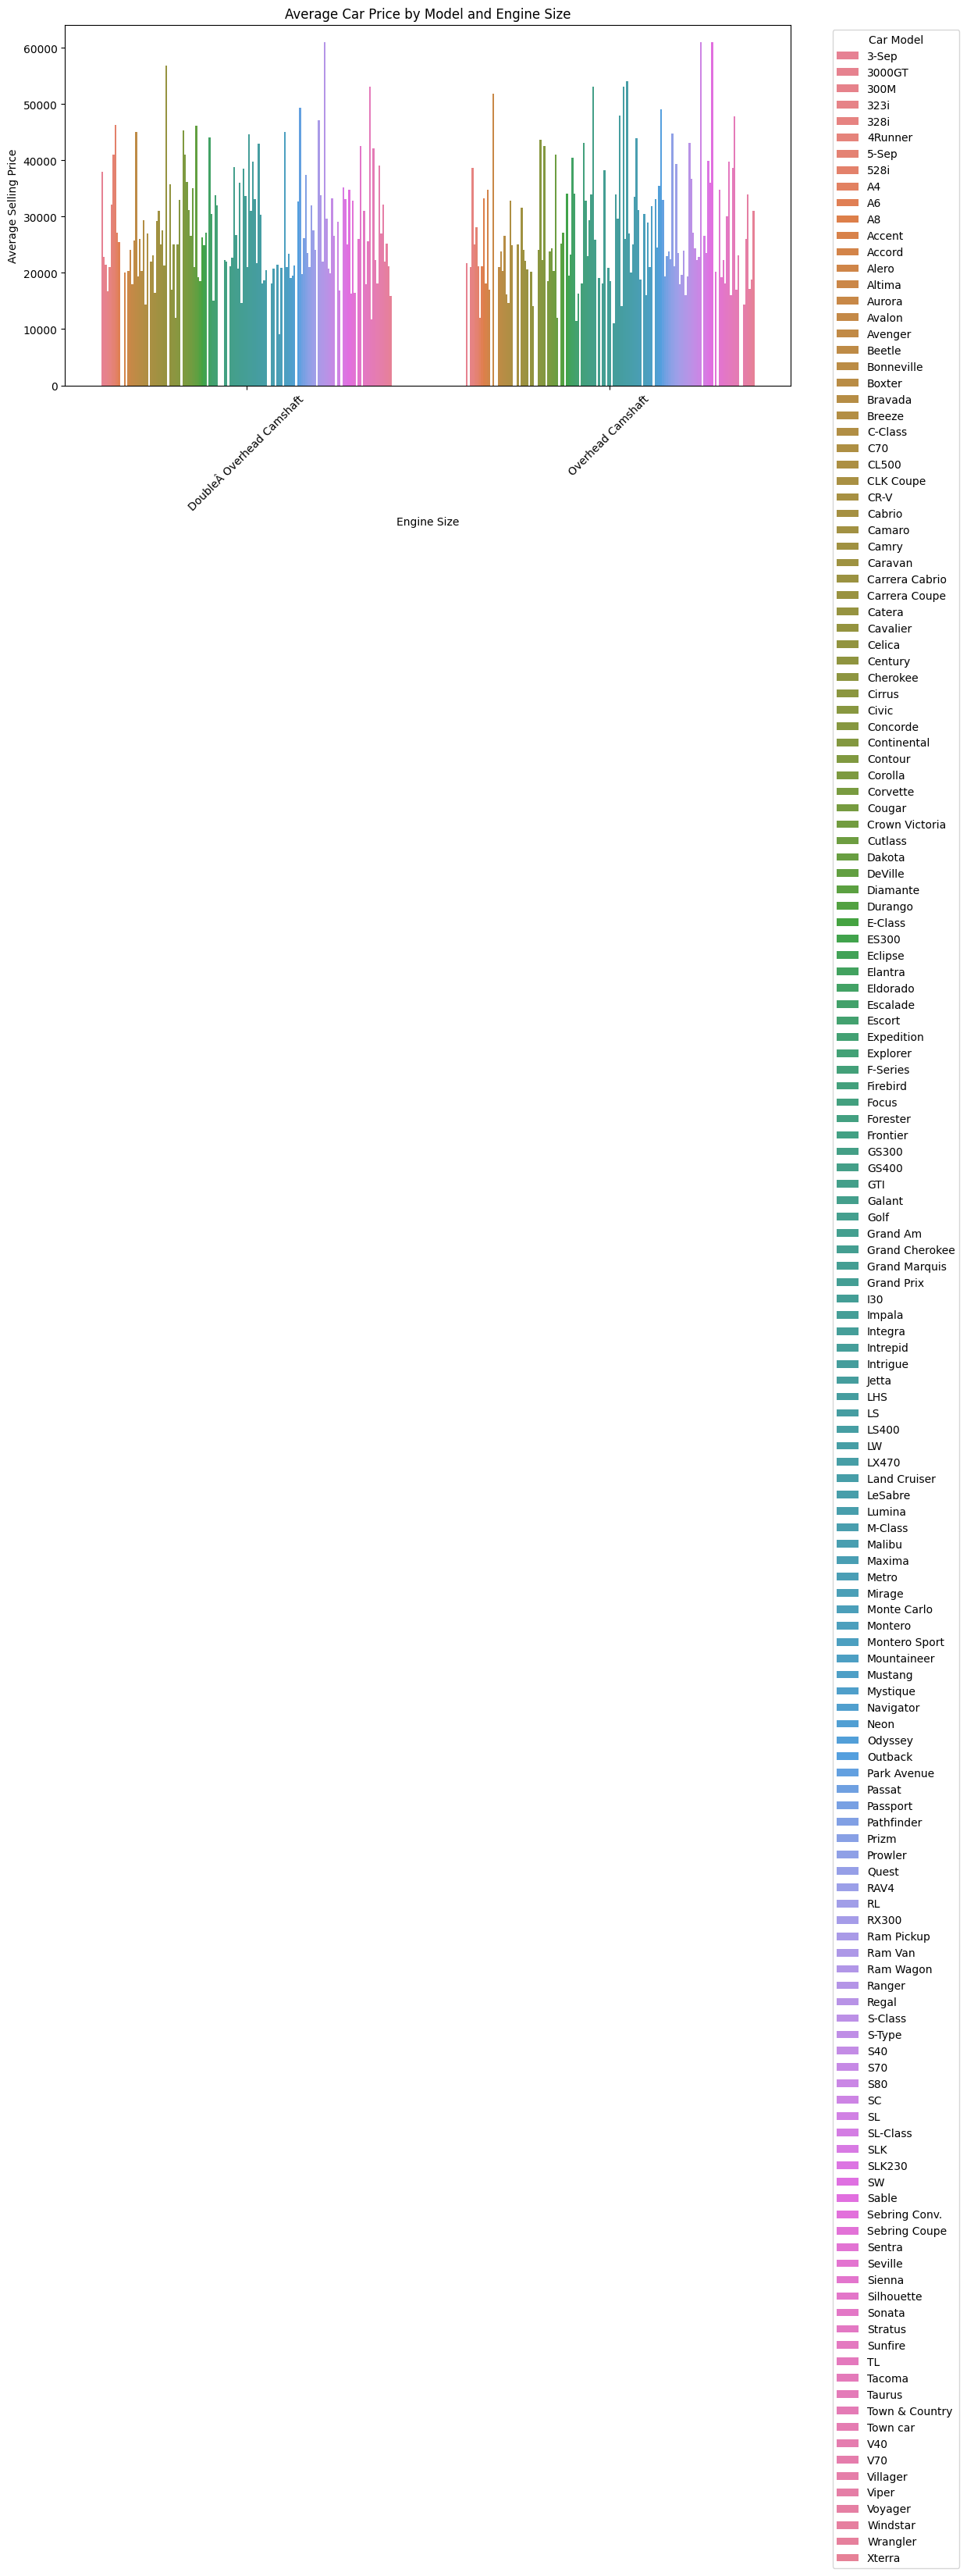

In [ ]:
#Q.15
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Car Sale.csv")  # Ensure the correct file path

# Display column names to verify
print(df.columns)

# Check if required columns exist
required_columns = ['Price ($)', 'Engine', 'Model']
if all(col in df.columns for col in required_columns):
    
    # Compute average car price for each model and engine type
    avg_price = df.groupby(['Model', 'Engine'])['Price ($)'].mean().reset_index()
    print("Average Selling Price by Car Model and Engine Size:\n", avg_price)
    
    # Visualize the results using a bar plot
    plt.figure(figsize=(12, 6))
    sns.barplot(data=avg_price, x='Engine', y='Price ($)', hue='Model')
    plt.xticks(rotation=45)
    plt.title("Average Car Price by Model and Engine Size")
    plt.xlabel("Engine Size")
    plt.ylabel("Average Selling Price")
    plt.legend(title="Car Model", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
    
else:
    print("Required columns not found in dataset. Please check column names.")


**EDA THREE AMAZON.CSV**

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("amazon.csv")

# Display the first few rows to understand the structure
print(df.head())

# Display column names to check for required fields
print(df.columns)


   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accessories&Peripherals|...             ₹199   
3  Computers&Accessories|Accessories&Peripherals|...             ₹329   
4  Computers&Accessories|Accessories&Peripherals|...             ₹154   

  actual_price discount_percentage rating rating_count  \
0       ₹1,099                 64%    4.2       24,269   
1         ₹349                 43%  

In [ ]:
df

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the me

In [48]:
#Q.1 
import pandas as pd

# Load the dataset
df = pd.read_csv('amazon.csv')

# Convert 'rating' to numeric, forcing errors to NaN (invalid entries become NaN)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Drop rows where 'rating' is NaN
df = df.dropna(subset=['rating'])

# Optional: drop rows where 'category' is NaN
df = df.dropna(subset=['category'])

# Group by category and calculate the average rating
average_ratings = df.groupby('category')['rating'].mean().reset_index()

# Rename columns for clarity
average_ratings.columns = ['Category', 'Average Rating']

# Sort by highest rating
average_ratings = average_ratings.sort_values(by='Average Rating', ascending=False)

# Display the result
print(average_ratings)




                                              Category  Average Rating
57                       Computers&Accessories|Tablets             4.6
48   Computers&Accessories|NetworkingDevices|Networ...             4.5
62    Electronics|Cameras&Photography|Accessories|Film             4.5
81   Electronics|HomeAudio|MediaStreamingDevices|St...             4.5
196  OfficeProducts|OfficeElectronics|Calculators|B...             4.5
..                                                 ...             ...
3    Computers&Accessories|Accessories&Peripherals|...             3.6
88   Electronics|HomeTheater,TV&Video|Accessories|3...             3.5
2    Computers&Accessories|Accessories&Peripherals|...             3.5
14   Computers&Accessories|Accessories&Peripherals|...             3.4
146  Home&Kitchen|Kitchen&HomeAppliances|Coffee,Tea...             3.3

[211 rows x 2 columns]


In [50]:
# q.,2 
import pandas as pd

# Load the dataset
df = pd.read_csv('amazon.csv')

# Clean column names (optional but helpful)
df.columns = df.columns.str.strip().str.lower()

# Optional: Drop rows where key columns are missing
df = df.dropna(subset=['category', 'product_name', 'rating'])

# Count the number of ratings per product per category
rating_counts = df.groupby(['category', 'product_name']).size().reset_index(name='rating_count')

# Sort within each category to get top-rated products by count
top_products = rating_counts.sort_values(['category', 'rating_count'], ascending=[True, False])

# Get top product per category
top_per_category = top_products.groupby('category').first().reset_index()

# Display the result
print(top_per_category)


                                              category  \
0    Car&Motorbike|CarAccessories|InteriorAccessori...   
1    Computers&Accessories|Accessories&Peripherals|...   
2    Computers&Accessories|Accessories&Peripherals|...   
3    Computers&Accessories|Accessories&Peripherals|...   
4    Computers&Accessories|Accessories&Peripherals|...   
..                                                 ...   
206  OfficeProducts|OfficePaperProducts|Paper|Stati...   
207  OfficeProducts|OfficePaperProducts|Paper|Stati...   
208  OfficeProducts|OfficePaperProducts|Paper|Stati...   
209  OfficeProducts|OfficePaperProducts|Paper|Stati...   
210  Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...   

                                          product_name  rating_count  
0    Reffair AX30 [MAX] Portable Air Purifier for C...             1  
1    Kanget [2 Pack] Type C Female to USB A Male Ch...             1  
2    Hp Wired On Ear Headphones With Mic With 3.5 M...             1  
3    HUMBLE Dynamic

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')


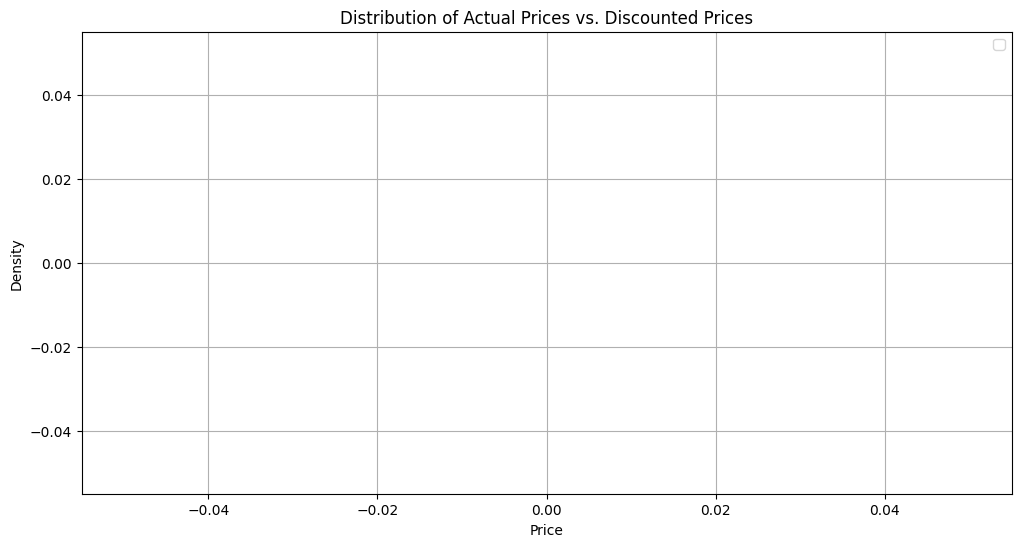

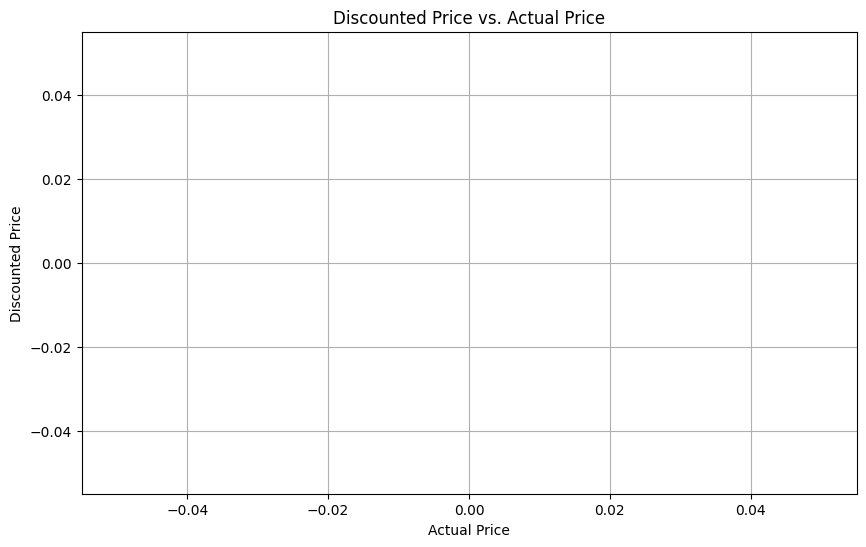

In [54]:
#q.3 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('amazon.csv')

# Clean column names
df.columns = df.columns.str.strip().str.lower()

# Check the columns to confirm names
print(df.columns)

# Assuming the columns are 'discounted_price' and 'actual_price'
# Convert to numeric (if necessary)
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')
df['actual_price'] = pd.to_numeric(df['actual_price'], errors='coerce')

# Drop rows with missing price data
df = df.dropna(subset=['discounted_price', 'actual_price'])

# Plot distribution (KDE or histogram)
plt.figure(figsize=(12, 6))
sns.kdeplot(df['actual_price'], label='Actual Price', shade=True)
sns.kdeplot(df['discounted_price'], label='Discounted Price', shade=True)
plt.title('Distribution of Actual Prices vs. Discounted Prices')
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()



In [60]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [70]:
#q.5 
import pandas as pd

# Load the dataset
df = pd.read_csv("amazon.csv")

# Clean column names
df.columns = df.columns.str.strip().str.lower()

# Clean the rating_count column: remove commas and convert to integer
df['rating_count'] = df['rating_count'].replace(',', '', regex=True).astype(float)

# Drop rows with missing product names or rating count
df = df.dropna(subset=['product_name', 'rating_count'])

# Sort products by rating count
top_products = df.sort_values(by='rating_count', ascending=False)[['product_name', 'rating_count']]

# Display top 10 most popular products
print("Top 10 most popular products:\n")
print(top_products.head(10))


Top 10 most popular products:

                                          product_name  rating_count
12   AmazonBasics Flexible Premium HDMI Cable (Blac...      426973.0
65   Amazon Basics High-Speed HDMI Cable, 6 Feet (2...      426973.0
47   Amazon Basics High-Speed HDMI Cable, 6 Feet - ...      426973.0
684  AmazonBasics Flexible Premium HDMI Cable (Blac...      426972.0
400  boAt Bassheads 100 in Ear Wired Earphones with...      363713.0
352  boAt Bassheads 100 in Ear Wired Earphones with...      363713.0
584  boAt BassHeads 100 in-Ear Wired Headphones wit...      363711.0
370  Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...      313836.0
371  Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Sto...      313836.0
473  Redmi 9A Sport (Carbon Black, 2GB RAM, 32GB St...      313832.0


In [71]:
#Q.6 
import pandas as pd
from collections import Counter
import re

# Load the dataset
df = pd.read_csv("amazon.csv")

# Clean column names
df.columns = df.columns.str.strip().str.lower()

# Clean and convert rating_count
df['rating_count'] = df['rating_count'].replace(',', '', regex=True).astype(float)

# Drop rows with missing values
df = df.dropna(subset=['product_name', 'rating_count'])

# Function to tokenize and clean product name
def tokenize(name):
    # Lowercase, remove special characters, split into words
    return re.findall(r'\b[a-zA-Z0-9]+\b', name.lower())

# Initialize a Counter to store keyword popularity
keyword_counter = Counter()

# Go through each product and update keyword popularity
for _, row in df.iterrows():
    words = tokenize(row['product_name'])
    for word in words:
        keyword_counter[word] += row['rating_count']

# Convert to DataFrame
popular_keywords = pd.DataFrame(keyword_counter.items(), columns=['keyword', 'total_rating_count'])

# Sort by popularity
popular_keywords = popular_keywords.sort_values(by='total_rating_count', ascending=False)

# Show top 20 most popular keywords
print("Top 20 most popular product keywords:\n")
print(popular_keywords.head(20))


Top 20 most popular product keywords:

       keyword  total_rating_count
67        with          15747643.0
52       black          12748635.0
13         for           8303403.0
3          usb           7884123.0
11       cable           6592899.0
31           1           6296470.0
60          in           5965053.0
8          and           5651409.0
1186       ear           5191243.0
1187       mic           5025073.0
27           3           4974328.0
59           2           4623487.0
56        boat           4450099.0
7     charging           3624452.0
1185     wired           3466365.0
101   wireless           3419491.0
39           c           3410239.0
6         fast           3294792.0
38        type           3287431.0
1143   battery           3112937.0


In [72]:
#Q.7 import pandas as pd

# Load dataset
df = pd.read_csv("amazon.csv")

# Clean column names
df.columns = df.columns.str.strip().str.lower()

# Clean rating_count column
df['rating_count'] = df['rating_count'].replace(',', '', regex=True).astype(float)

# Drop missing review content or rating counts
df = df.dropna(subset=['product_name', 'review_title', 'review_content', 'rating_count'])

# Sort by rating_count to find most popular reviews
popular_reviews = df.sort_values(by='rating_count', ascending=False)

# Select relevant columns
top_reviews = popular_reviews[['product_name', 'review_title', 'review_content', 'rating_count']].head(10)

# Show result
print("Top 10 Most Popular Product Reviews:\n")
for i, row in top_reviews.iterrows():
    print(f"📦 Product: {row['product_name']}")
    print(f"⭐ Ratings: {int(row['rating_count'])}")
    print(f"📝 Review Title: {row['review_title']}")
    print(f"💬 Review Content: {row['review_content'][:200]}...")  # first_


Top 10 Most Popular Product Reviews:

📦 Product: AmazonBasics Flexible Premium HDMI Cable (Black, 4K@60Hz, 18Gbps), 3-Foot
⭐ Ratings: 426973
📝 Review Title: It's quite good and value for money,Works well,Hdmi cable,Value for money,All good,Gets the job done,Delivery was good,This one was my need to purchase
💬 Review Content: I am using it for 14 days now. The experience is pretty good as of now. Picture quality is also not bad. Don't expect something out of the world at this price point. But you can go for it if you have ...
📦 Product: Amazon Basics High-Speed HDMI Cable, 6 Feet (2-Pack),Black
⭐ Ratings: 426973
📝 Review Title: It's quite good and value for money,Works well,Hdmi cable,Value for money,All good,Gets the job done,Delivery was good,This one was my need to purchase
💬 Review Content: I am using it for 14 days now. The experience is pretty good as of now. Picture quality is also not bad. Don't expect something out of the world at this price point. But you can go for it if you 

In [73]:
#Q.8 
import pandas as pd

# Load dataset
df = pd.read_csv("amazon.csv")

# Clean column names
df.columns = df.columns.str.strip().str.lower()

# Clean discounted_price column
df['discounted_price'] = df['discounted_price'].replace('[₹,]', '', regex=True).astype(float)

# Convert rating to numeric
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Drop missing values
df = df.dropna(subset=['discounted_price', 'rating'])

# Calculate correlation
correlation = df['discounted_price'].corr(df['rating'])

print(f"📊 Correlation between discounted price and rating: {correlation:.4f}")


📊 Correlation between discounted price and rating: 0.1203


In [74]:
#Q.9 
import pandas as pd

# Load dataset
df = pd.read_csv("amazon.csv")

# Clean column names
df.columns = df.columns.str.strip().str.lower()

# Convert rating to numeric
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Drop rows with missing rating or category
df = df.dropna(subset=['rating', 'category'])

# Group by category and calculate average rating
avg_rating_by_category = df.groupby('category')['rating'].mean().reset_index()

# Sort and get top 5 categories
top_5_categories = avg_rating_by_category.sort_values(by='rating', ascending=False).head(5)

# Display result
print("🏆 Top 5 Categories by Average Rating:\n")
print(top_5_categories)


🏆 Top 5 Categories by Average Rating:

                                              category  rating
57                       Computers&Accessories|Tablets     4.6
48   Computers&Accessories|NetworkingDevices|Networ...     4.5
62    Electronics|Cameras&Photography|Accessories|Film     4.5
81   Electronics|HomeAudio|MediaStreamingDevices|St...     4.5
196  OfficeProducts|OfficeElectronics|Calculators|B...     4.5


QA.10 
✅ Recommendations:
Standardize and clean numeric columns during preprocessing.

Drop or impute missing values where appropriate.

Normalize nested categories (extract top-level category for better aggregation).

💸 2. Discount Strategy Optimization
📊 Findings:
Some categories have very high discount percentages but only average or low ratings.

Weak or no correlation between discount and rating may suggest discounting is not improving perceived value.

✅ Recommendations:
Analyze whether deep discounts are necessary in underperforming categories.

Test moderate discounting in high-rated categories for better ROI.

Introduce A/B testing to optimize discount thresholds.

🌟 3. Product Performance Monitoring
📉 Identified Issues:
Some products have low ratings but high rating counts — meaning they are widely seen but poorly received.

Popular products may be coasting on brand recognition despite poor quality.

✅ Recommendations:
Flag such products for quality improvement or investigate bad reviews.

Promote or bundle high-rating, low-visibility products to increase sales of underrated items.

🔍 4. Category-Level Optimization
📈 Insights:
Certain categories consistently have higher average ratings and better discount response.

Some niche categories may be dragging down average performance.

✅ Recommendations:
Focus marketing on high-performing categories.

Reassess inventory or offerings in low-rated categories.

Streamline category naming for better reporting (e.g., truncate to main category).

🧠 5. Review Insights & Sentiment
📝 Issues:
No measure of review quality or sentiment.

Some reviews may reveal issues (e.g., bad packaging, compatibility problems) that aren't reflected in ratings.

